In [0]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
import numpy as np
print(x_train.shape)
print(y_train)
print(len(np.unique(y_train)))
x_train = x_train/255
x_test = x_test/255
y_train = y_train.flatten()
y_test = y_test.flatten()

(50000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
10


In [0]:
i = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = 'same')(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = 'same')(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu", padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu", padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = "relu", padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = "relu", padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x=  tf.keras.layers.Dense(10, activation = "softmax")(x)
model = tf.keras.models.Model(i,x)



In [0]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [9]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1871 - accuracy: 0.9361 - val_loss: 0.8006 - val_accuracy: 0.7969
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1538 - accuracy: 0.9483 - val_loss: 0.7830 - val_accuracy: 0.8060
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1443 - accuracy: 0.9509 - val_loss: 0.9117 - val_accuracy: 0.7851
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1366 - accuracy: 0.9542 - val_loss: 0.7931 - val_accuracy: 0.7740
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1290 - accuracy: 0.9566 - val_loss: 0.9546 - val_accuracy: 0.7861
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1169 - accuracy: 0.9606 - val_loss: 1.0018 - val_accuracy: 0.7944
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1149 - accuracy: 0.9627 - val_loss: 0.9077 - val_accuracy:

In [0]:
batch_size= 32
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)

In [29]:
train_generator = img_gen.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size #total number of elements divided by batch size as an rounded down integer
r = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs = 10, validation_data = (x_test, y_test))


Epoch 1/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.4772 - accuracy: 0.4865 - val_loss: 1.1906 - val_accuracy: 0.5903
Epoch 2/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.0634 - accuracy: 0.6271 - val_loss: 1.0357 - val_accuracy: 0.6461
Epoch 3/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9192 - accuracy: 0.6809 - val_loss: 0.8572 - val_accuracy: 0.7026
Epoch 4/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8295 - accuracy: 0.7152 - val_loss: 0.7541 - val_accuracy: 0.7418
Epoch 5/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7569 - accuracy: 0.7419 - val_loss: 0.9491 - val_accuracy: 0.6908
Epoch 6/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7074 - accuracy: 0.7578 - val_loss: 0.7773 - val_accuracy: 0.7323
Epoch 7/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6613 - accuracy: 0.7740 - val_loss: 0.6322 -

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [0]:
import matplotlib.pyplot as plt

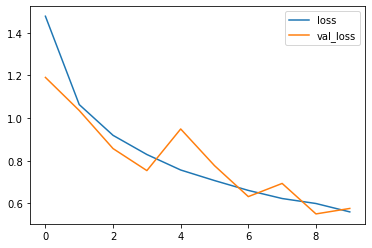

In [34]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, np.argmax(model.predict(x_test),axis=-1)))
print(classification_report(y_test, np.argmax(model.predict(x_test),axis=-1)))


[[838  19  44  10   9   3   7   2  40  28]
 [  8 919   1   2   1   0   2   1   4  62]
 [ 33   2 765  21  56  30  68   5  11   9]
 [ 20  16  56 569  59 110 112  16  19  23]
 [ 11   3  47  16 834   6  56  19   5   3]
 [ 12   5  57  99  59 679  52  26   4   7]
 [  8   5  18  19  17   6 915   3   4   5]
 [ 27   8  37  20  63  24  10 794   1  16]
 [ 54  30   7   3   4   0   4   2 868  28]
 [ 11  45   1   6   0   0   4   0   9 924]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.87      0.92      0.90      1000
           2       0.74      0.77      0.75      1000
           3       0.74      0.57      0.64      1000
           4       0.76      0.83      0.79      1000
           5       0.79      0.68      0.73      1000
           6       0.74      0.92      0.82      1000
           7       0.91      0.79      0.85      1000
           8       0.90      0.87      0.88      1000
           9       0.84     

In [0]:
misclassified = np.where(y_test != np.argmax(model.predict(x_test),axis=-1))[0]

Text(0.5, 1.0, 'Actual value dog, predicted value cat')

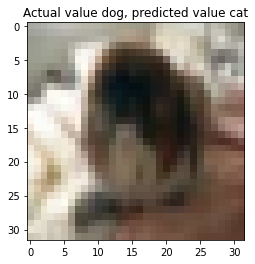

In [39]:
#shows a random misclassified image and what the model predicted versus waht it actually was
rand_index = np.random.choice(misclassified)
plt.imshow(x_test[rand_index])
plt.title(f"Actual value {labels[y_test[rand_index]]}, predicted value {labels[np.argmax(model.predict(x_test),axis=-1)[rand_index]]}")

In [40]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        3692